In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
from postBornCrossSpectra import PostBorn_Bispec
import numpy as np
import Cosmology as C
import pickle
from scipy.integrate import simps
from scipy.interpolate import RectBivariateSpline
from classy import Class

import copy
import kernels
plt.style.use(['seaborn-colorblind','paper'])
plt.style.use('classic')

In [2]:
path = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/CrossPostBorn/data/class_postlimberdensity/inifiles/'

In [3]:
zmin=4.8
zmax=5.
step=0.01
filename = 'class_z%03dz%03d_cl.dat'%(zmin*100,zmax*100)

In [4]:
corrs = np.loadtxt(path+filename)
print(corrs.shape)

(2999, 67)


In [5]:
zs = np.arange(zmin,zmax+step,step)

In [6]:
L = corrs[:,0]

In [7]:
print(len(corrs[0,:]))

67


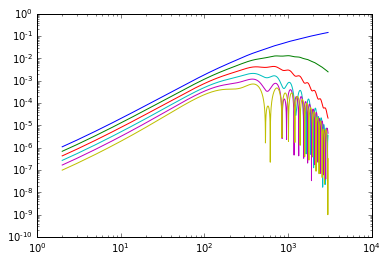

In [8]:
ii=1
plt.loglog(corrs[:,0],corrs[:,ii])
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+1]))
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+2]))
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+3]))
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+4]))
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+5]))

In [9]:
from scipy.interpolate import interp1d
func = interp1d(L[0:250],corrs[0:250,2],bounds_error=False,fill_value=0.)
func2= interp1d(L[0:100],corrs[0:100,3],bounds_error=False,fill_value=0.)

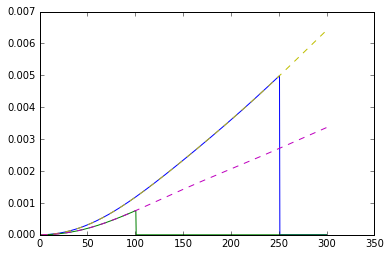

In [10]:
l=np.linspace(0,300,800)
plt.plot(l,func(l))
plt.plot(l,func2(l))
plt.plot(L[0:300],corrs[0:300,2],ls='--',c='y')
plt.plot(L[0:300],corrs[0:300,3],ls='--',c='m')

In [11]:
jj = 10

In [12]:
L[jj]

12.0

In [13]:
indices = np.zeros((66,2))
count = 0
for ii in np.arange(11):
    for nn in np.arange(ii,11):
        indices[count]=[ii,nn]
        count+=1

In [14]:
zs    = np.arange(0,5+0.01,step=0.02)
print(zs)
zmins = np.arange(0,4.9,0.1)
zmaxs = np.arange(0.2,5+0.1,0.1)
print(zmins)
print(zmaxs)

[ 0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22
  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46
  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7
  0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94
  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1   1.12  1.14  1.16  1.18
  1.2   1.22  1.24  1.26  1.28  1.3   1.32  1.34  1.36  1.38  1.4   1.42
  1.44  1.46  1.48  1.5   1.52  1.54  1.56  1.58  1.6   1.62  1.64  1.66
  1.68  1.7   1.72  1.74  1.76  1.78  1.8   1.82  1.84  1.86  1.88  1.9
  1.92  1.94  1.96  1.98  2.    2.02  2.04  2.06  2.08  2.1   2.12  2.14
  2.16  2.18  2.2   2.22  2.24  2.26  2.28  2.3   2.32  2.34  2.36  2.38
  2.4   2.42  2.44  2.46  2.48  2.5   2.52  2.54  2.56  2.58  2.6   2.62
  2.64  2.66  2.68  2.7   2.72  2.74  2.76  2.78  2.8   2.82  2.84  2.86
  2.88  2.9   2.92  2.94  2.96  2.98  3.    3.02  3.04  3.06  3.08  3.1
  3.12  3.14  3.16  3.18  3.2   3.22  3.24  3.26  3.28

In [15]:
interp_matrix = np.zeros((len(zs),len(zs)))

In [16]:
step    = 0.02
Lind    = 10
filenum = 0
zmin    = zmins[filenum]
zmax    = zmaxs[filenum]
filename = 'class_z%03dz%03d_cl.dat'%(zmin*100,zmax*100)
corrs    = np.loadtxt(path+filename)
corrs    = corrs[:,1::]
print(corrs.shape)
for ii in range(len(zs)):
    print('ii',ii)
    for jj in range(ii,ii+5): #track correlation only for delta z = 0.5
        if jj < len(zs):
            z1 = zs[ii]
            z2 = zs[jj]
            #print(z1,z2)
            if z2<zmax+0.001:
                print('%.2f, %.2f, %.2f, %.2f'%(z1,z2,zmin,zmax))
                ind1 = int((z1-zmin)/step)
                ind2 = int((z2-zmin)/step)
                index = np.all(np.equal(indices,[ind1,ind2]),axis=1)
                val = corrs[Lind,index]
            else:
                filenum+=1
                print(filenum)
                
                zmin = zmins[filenum]
                zmax = zmaxs[filenum]
                print('%.2f, %.2f, %.2f, %.2f'%(z1,z2,zmin,zmax))
                filename = 'class_z%03dz%03d_cl.dat'%(zmin*100,zmax*100)
                corrs    = np.loadtxt(path+filename)
                corrs    = corrs[:,1::]
                ind1 = int((z1-zmin)/step)
                ind2 = int((z2-zmin)/step)
                index = np.all(np.equal(indices,[ind1,ind2]),axis=1)
                val = corrs[Lind,index]
            interp_matrix[ii,jj] = val
            
            interp_matrix[jj,ii] = interp_matrix[ii,jj] #hopefully creates only a pointer :)    


(999, 66)
('ii', 0)
0.00, 0.00, 0.00, 0.20
0.00, 0.02, 0.00, 0.20
0.00, 0.04, 0.00, 0.20
0.00, 0.06, 0.00, 0.20
0.00, 0.08, 0.00, 0.20
('ii', 1)
0.02, 0.02, 0.00, 0.20
0.02, 0.04, 0.00, 0.20
0.02, 0.06, 0.00, 0.20
0.02, 0.08, 0.00, 0.20
0.02, 0.10, 0.00, 0.20
('ii', 2)
0.04, 0.04, 0.00, 0.20
0.04, 0.06, 0.00, 0.20
0.04, 0.08, 0.00, 0.20
0.04, 0.10, 0.00, 0.20
0.04, 0.12, 0.00, 0.20
('ii', 3)
0.06, 0.06, 0.00, 0.20
0.06, 0.08, 0.00, 0.20
0.06, 0.10, 0.00, 0.20
0.06, 0.12, 0.00, 0.20
0.06, 0.14, 0.00, 0.20
('ii', 4)
0.08, 0.08, 0.00, 0.20
0.08, 0.10, 0.00, 0.20
0.08, 0.12, 0.00, 0.20
0.08, 0.14, 0.00, 0.20
0.08, 0.16, 0.00, 0.20
('ii', 5)
0.10, 0.10, 0.00, 0.20
0.10, 0.12, 0.00, 0.20
0.10, 0.14, 0.00, 0.20
0.10, 0.16, 0.00, 0.20
0.10, 0.18, 0.00, 0.20
('ii', 6)
0.12, 0.12, 0.00, 0.20
0.12, 0.14, 0.00, 0.20
0.12, 0.16, 0.00, 0.20
0.12, 0.18, 0.00, 0.20
0.12, 0.20, 0.00, 0.20
('ii', 7)
0.14, 0.14, 0.00, 0.20
0.14, 0.16, 0.00, 0.20
0.14, 0.18, 0.00, 0.20
0.14, 0.20, 0.00, 0.20
1
0.14, 0.22,

('ii', 68)
1.36, 1.36, 1.30, 1.50
1.36, 1.38, 1.30, 1.50
1.36, 1.40, 1.30, 1.50
1.36, 1.42, 1.30, 1.50
1.36, 1.44, 1.30, 1.50
('ii', 69)
1.38, 1.38, 1.30, 1.50
1.38, 1.40, 1.30, 1.50
1.38, 1.42, 1.30, 1.50
1.38, 1.44, 1.30, 1.50
1.38, 1.46, 1.30, 1.50
('ii', 70)
1.40, 1.40, 1.30, 1.50
1.40, 1.42, 1.30, 1.50
1.40, 1.44, 1.30, 1.50
1.40, 1.46, 1.30, 1.50
1.40, 1.48, 1.30, 1.50
('ii', 71)
1.42, 1.42, 1.30, 1.50
1.42, 1.44, 1.30, 1.50
1.42, 1.46, 1.30, 1.50
1.42, 1.48, 1.30, 1.50
1.42, 1.50, 1.30, 1.50
('ii', 72)
1.44, 1.44, 1.30, 1.50
1.44, 1.46, 1.30, 1.50
1.44, 1.48, 1.30, 1.50
1.44, 1.50, 1.30, 1.50
14
1.44, 1.52, 1.40, 1.60
('ii', 73)
1.46, 1.46, 1.40, 1.60
1.46, 1.48, 1.40, 1.60
1.46, 1.50, 1.40, 1.60
1.46, 1.52, 1.40, 1.60
1.46, 1.54, 1.40, 1.60
('ii', 74)
1.48, 1.48, 1.40, 1.60
1.48, 1.50, 1.40, 1.60
1.48, 1.52, 1.40, 1.60
1.48, 1.54, 1.40, 1.60
1.48, 1.56, 1.40, 1.60
('ii', 75)
1.50, 1.50, 1.40, 1.60
1.50, 1.52, 1.40, 1.60
1.50, 1.54, 1.40, 1.60
1.50, 1.56, 1.40, 1.60
1.50, 1.58, 

('ii', 133)
2.66, 2.66, 2.60, 2.80
2.66, 2.68, 2.60, 2.80
2.66, 2.70, 2.60, 2.80
2.66, 2.72, 2.60, 2.80
2.66, 2.74, 2.60, 2.80
('ii', 134)
2.68, 2.68, 2.60, 2.80
2.68, 2.70, 2.60, 2.80
2.68, 2.72, 2.60, 2.80
2.68, 2.74, 2.60, 2.80
2.68, 2.76, 2.60, 2.80
('ii', 135)
2.70, 2.70, 2.60, 2.80
2.70, 2.72, 2.60, 2.80
2.70, 2.74, 2.60, 2.80
2.70, 2.76, 2.60, 2.80
2.70, 2.78, 2.60, 2.80
('ii', 136)
2.72, 2.72, 2.60, 2.80
2.72, 2.74, 2.60, 2.80
2.72, 2.76, 2.60, 2.80
2.72, 2.78, 2.60, 2.80
2.72, 2.80, 2.60, 2.80
('ii', 137)
2.74, 2.74, 2.60, 2.80
2.74, 2.76, 2.60, 2.80
2.74, 2.78, 2.60, 2.80
2.74, 2.80, 2.60, 2.80
27
2.74, 2.82, 2.70, 2.90
('ii', 138)
2.76, 2.76, 2.70, 2.90
2.76, 2.78, 2.70, 2.90
2.76, 2.80, 2.70, 2.90
2.76, 2.82, 2.70, 2.90
2.76, 2.84, 2.70, 2.90
('ii', 139)
2.78, 2.78, 2.70, 2.90
2.78, 2.80, 2.70, 2.90
2.78, 2.82, 2.70, 2.90
2.78, 2.84, 2.70, 2.90
2.78, 2.86, 2.70, 2.90
('ii', 140)
2.80, 2.80, 2.70, 2.90
2.80, 2.82, 2.70, 2.90
2.80, 2.84, 2.70, 2.90
2.80, 2.86, 2.70, 2.90
2.80

('ii', 198)
3.96, 3.96, 3.90, 4.10
3.96, 3.98, 3.90, 4.10
3.96, 4.00, 3.90, 4.10
3.96, 4.02, 3.90, 4.10
3.96, 4.04, 3.90, 4.10
('ii', 199)
3.98, 3.98, 3.90, 4.10
3.98, 4.00, 3.90, 4.10
3.98, 4.02, 3.90, 4.10
3.98, 4.04, 3.90, 4.10
3.98, 4.06, 3.90, 4.10
('ii', 200)
4.00, 4.00, 3.90, 4.10
4.00, 4.02, 3.90, 4.10
4.00, 4.04, 3.90, 4.10
4.00, 4.06, 3.90, 4.10
4.00, 4.08, 3.90, 4.10
('ii', 201)
4.02, 4.02, 3.90, 4.10
4.02, 4.04, 3.90, 4.10
4.02, 4.06, 3.90, 4.10
4.02, 4.08, 3.90, 4.10
4.02, 4.10, 3.90, 4.10
('ii', 202)
4.04, 4.04, 3.90, 4.10
4.04, 4.06, 3.90, 4.10
4.04, 4.08, 3.90, 4.10
4.04, 4.10, 3.90, 4.10
40
4.04, 4.12, 4.00, 4.20
('ii', 203)
4.06, 4.06, 4.00, 4.20
4.06, 4.08, 4.00, 4.20
4.06, 4.10, 4.00, 4.20
4.06, 4.12, 4.00, 4.20
4.06, 4.14, 4.00, 4.20
('ii', 204)
4.08, 4.08, 4.00, 4.20
4.08, 4.10, 4.00, 4.20
4.08, 4.12, 4.00, 4.20
4.08, 4.14, 4.00, 4.20
4.08, 4.16, 4.00, 4.20
('ii', 205)
4.10, 4.10, 4.00, 4.20
4.10, 4.12, 4.00, 4.20
4.10, 4.14, 4.00, 4.20
4.10, 4.16, 4.00, 4.20
4.10

In [17]:
data = C.CosmoData(C.Planck2015[1],np.linspace(0.,5.,200))
chi  = data.chi(zs)

computing distances, derived parameters...
{'Neff': 3.046}
{'h': 0.68}
{'m_ncdm_tot': 0.0}
{'omega_m': 0.6608555034063286}


In [77]:
from scipy.interpolate import RectBivariateSpline as RBS
from scipy.interpolate import interp2d

chi1, chi2 = np.meshgrid(chi,chi)

func = RBS(chi,chi,interp_matrix,kx=1,ky=1)#, bounds_error=False, fill_value=0.) #RBS and interp2d are the same, just differnt wrappers

zs_t = np.arange(0,5+0.01,step=0.01)

chi_ = data.chi(zs_t)

spline = func(chi_,chi_)

/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


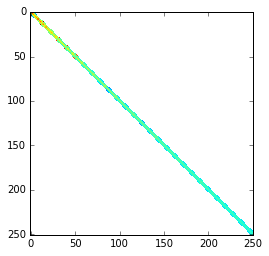

In [76]:
plt.figure()
plt.imshow(np.log(abs(interp_matrix)))
plt.imshow(np.log(-interp_matrix))
plt.show()

/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


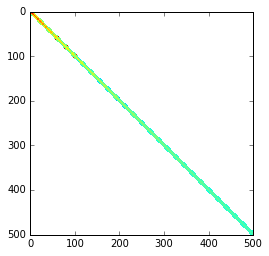

In [62]:
plt.figure()
plt.imshow(np.log(abs(spline)))
plt.imshow(np.log(-spline))
plt.show()

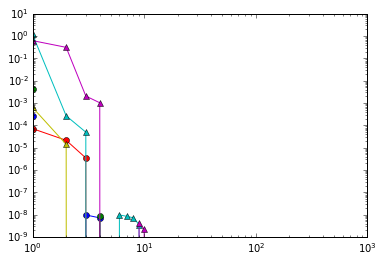

In [63]:
plt.loglog(interp_matrix[0,0:20],marker='o')
plt.plot(interp_matrix[1,1:21],marker='o')
plt.plot(interp_matrix[100,100:120],marker='o')
plt.loglog(spline[0,0:40],marker='^')
plt.plot(spline[1,1:42],marker='^')
plt.plot(spline[100,100:240],marker='^')